# Bivariadas - gráficos de barra para correlação de variáveis qualitativas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# abrindo df de grojetas do sns.
tips = sns.load_dataset("tips")
tips['percent_tips'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,sex,smoker,day,time,size,percent_tips
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


<Axes: xlabel='smoker', ylabel='count'>

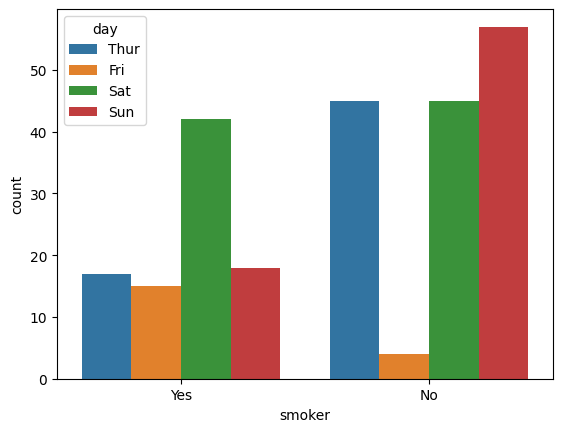

In [4]:
# o atributo hue cria barras separadas para cada categoria neste caso indentificar a fr de fumantes ou não fumantes em quais dias da semana.
# mais indicado para variáveis qualitativas verificando correlação
sns.countplot(x='smoker',hue='day',data=tips[tips['percent_tips'] < 1])

In [7]:
# método para cruzar dados númericos em um df.
cross_smo_day = pd.crosstab(tips['smoker'], tips['day'])
cross_smo_day

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


In [8]:
#somando as primeiras por linhas obs se fosse para somar as colunas colocaria apenas sum()
cross_smo_day.sum(axis=1)

smoker
Yes     93
No     151
dtype: int64

In [13]:
# metodo  div ultilizado para dividir cada elemento da linhas pelo total especificado acima.
percent_line = cross_smo_day.div(cross_smo_day.sum(axis=1),axis=0)
percent_line.round(2)

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,0.18,0.16,0.45,0.20
No,0.30,0.03,0.30,0.38


<Axes: xlabel='smoker'>

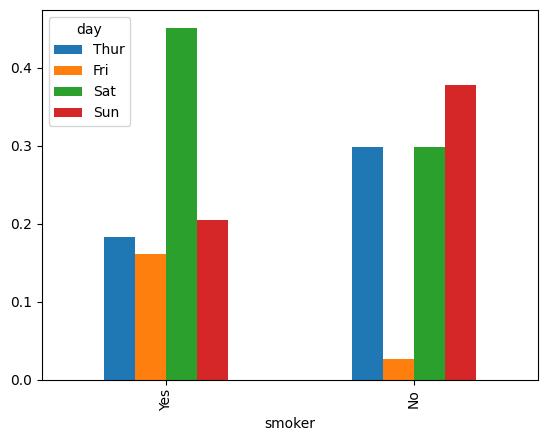

In [14]:
#criando gráfico considerando que agora a porcentagem está relacionada ao total de smokes e não smokes a comparação fica mais justa.
percent_line.plot.bar()

smoker  Yes  No
day            
Thur     17  45
Fri      15   4
Sat      42  45
Sun      19  57
day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64
smoker   Yes    No
day               
Thur    0.27  0.73
Fri     0.79  0.21
Sat     0.48  0.52
Sun     0.25  0.75


<Axes: title={'center': 'percentual_smoker_por_dia'}, xlabel='day'>

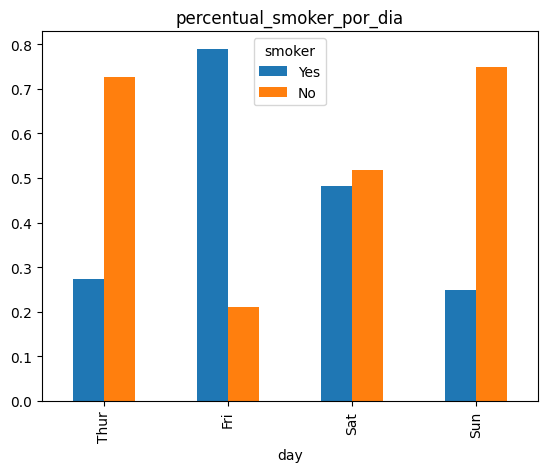

In [21]:
# relizando de forma mais usual   sum(1) é a mesma coisa de somar por linhas axis=1
# esse tipo de abordagem ajuda para veirifcar inadimplentes por profissão , ou qual melhor tratamento segundo x técnica.
cross_day_smo = pd.crosstab(tips['day'],tips['smoker'])
print(cross_day_smo)
print(cross_day_smo.sum(axis=1))
percent_line1 = cross_day_smo.div(cross_day_smo.sum(axis=1),axis=0)
print(percent_line1.round(2))
percent_line1.plot.bar(title='percentual_smoker_por_dia')

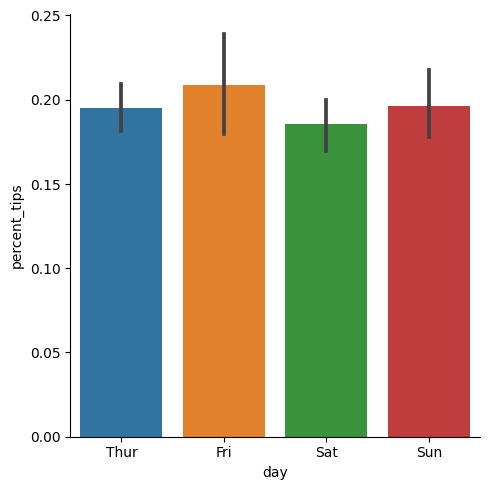

In [22]:
#grafico de barras com a função  catplot() exemplo em que dia da semana o percentual de gorgeta é maior

sns.catplot(x='day'
            , y='percent_tips'
            , kind='bar' # tipo de gráfico barras
            , data= tips[tips.percent_tips < 1])


<ipython-input-25-0debb8a5126b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='day',y='total_bill',hue='smoker',kind='bar',estimator=sum ,ci=None,data=tips[tips['percent_tips'] < 1])


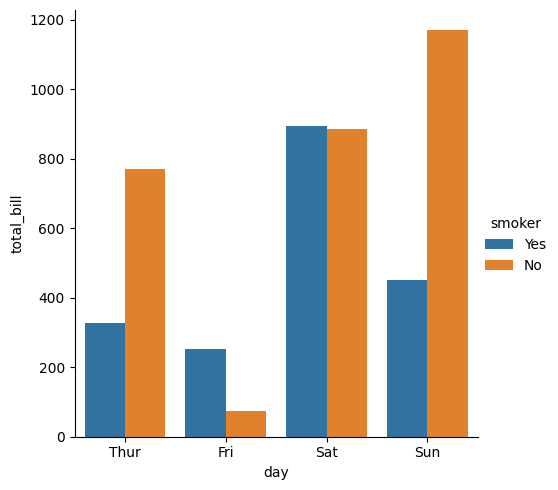

In [25]:
# que dia da semana os fumantes consomem mais ?   para tirar o intervalo de confiança , ci=None.
sns.catplot(x='day',y='total_bill',hue='smoker',kind='bar',estimator=sum ,ci=None,data=tips[tips['percent_tips'] < 1])

<ipython-input-35-5b448d52c2c8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='day',y='percent_tips',kind='bar',row='time',col='smoker',ci=None,hue='sex',data=tips)


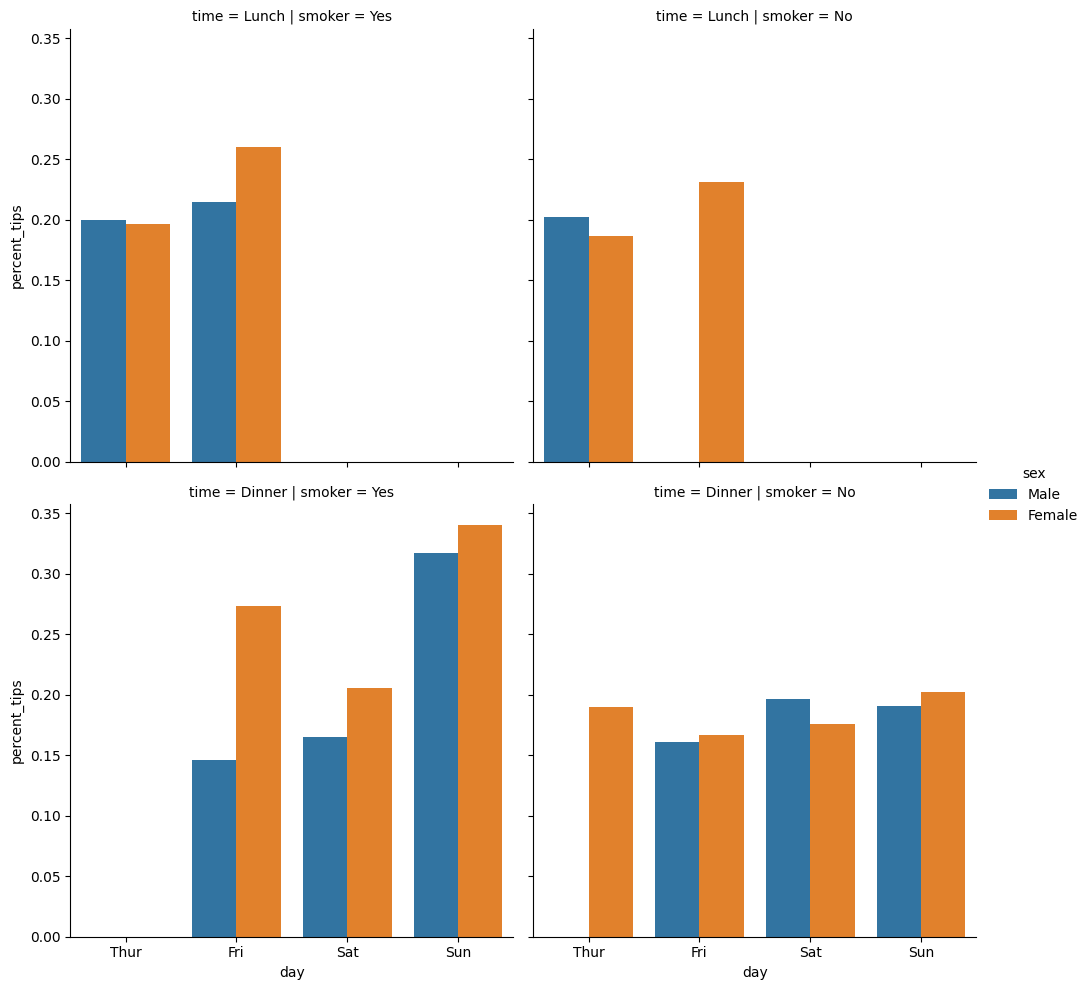

In [35]:
# realizando uma grade gráficos verificando o percentual de gorjetas para  tempo ou seja seja hora de almoço e jantar para gêneros diferentes
sns.catplot(x='day',y='percent_tips',kind='bar',row='time',col='smoker',ci=None,hue='sex',data=tips)